<a href="https://colab.research.google.com/github/jsebastianquiroga/PUJ_NLP_IA/blob/main/proyecto/motor_recomendaci%C3%B3n_texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img style="float: center; padding-right: 10px;" src="https://www.pikpng.com/pngl/b/467-4670553_universidad-javeriana-esslingen-am-neckar-clipart.png" width="100" height="150">



<h1> <strong>Aprendizaje Profundo.</strong></h1>
<h2> Para: Ing. Julio Omar Palacio Niño, M.Sc.</br></h2>
<h2>Integrantes:</br></h2>
<h2>Antonio Jose Caicedo.</br></h2>
<h2>Leonardo García.</br></h2>
<h2>Juan Sebastián Quiroga Bernal. </h2>

**Este colab puede ser ejecutado por cualquier usuario sin necesidad de cargar los archivos al entorno, debido a que la conexión está configurada para acceder a los archivos desde la nube**.


<h1> <strong>Taller 1: Twitter User Gender Classification.</strong></h1>

En el presente Notebook, se exploraran los datos del data set de Kaggel: Twitter User Gender Classification. https://www.kaggle.com/crowdflower/twitter-user-gender-classification/

Este conjunto de datos, fue utilziado para entranar un modelo de clasificación de genero conocido como "CrowdFlower AI".

Cuyo proposito era inferir mendiante el perfil de un usuario de Twitter si el usuario era un hombre, mujer o compañia.

Se tienen un total de 20.000 observaciones, conformadas con un nombre de usuario, tuit aleatorio, perfil, la imagen de la cuenta, la ubicación.

<ol>
_unit_id: un id único para el usuario</ol>
<ol>_golden: si el usuario se incluyó en el patrón oro del modelo; TRUE o FALSE</ol>
<ol>_unit_state: estado de la observación; uno de finalized (para contributor-judged) o golden (para gold standard observations)</ol>
<ol>_trusted_judgments: número de juicios de confianza (int); siempre 3 para las observaciones no gold, y lo que puede ser un identificador único para las observaciones gold standard</ol>
<ol>_last_judgment_at: fecha y hora de la última resolución del contribuyente; en blanco para las observaciones gold standard</ol>
<ol>gender: uno de masculino, femenino o marca (para perfiles no humanos)</ol>
<ol>gender:confidence: valor flotante que representa la confianza en el sexo indicado</ol>
<ol>profile_yn: "no" aquí parece significar que el perfil debía formar parte del conjunto de datos pero no estaba disponible cuando los colaboradores fueron a juzgarlo</ol>
<ol>profile_yn:confidence: confianza en la existencia/no existencia del perfil</ol>
<ol>created: fecha y hora de creación del perfil</ol>
<ol>description: descripción del perfil del usuario</ol>
<ol>fav_number: número de tweets que el usuario ha marcado como favoritos</ol>
<ol>gender_gold: si el perfil es dorado, ¿cuál es el género?</ol>
<ol>link_color: el color del enlace en el perfil, como valor hexadecimal</ol>
<ol>name: nombre del usuario</ol>
<ol>profile_yn_gold: si el valor s/n del perfil es dorado</ol>
<ol>profileimage: un enlace a la imagen del perfil</ol>
<ol>retweet_count: número de veces que el usuario ha retuiteado (o posiblemente, ha sido retuiteado)</ol>
<ol>sidebar_color: color de la barra lateral del perfil, como valor hexadecimal</ol>
<ol>text: texto de un tweet aleatorio del usuario</ol>
<ol>tweet_coord: si el usuario tiene activada la localización, las coordenadas</ol>
<ol>como una cadena con el formato "[latitud, longitud]"</ol>
<ol>tweet_count: número de tweets que ha publicado el usuario</ol>
<ol>tweet_created: cuando se creó el tweet aleatorio (en la columna de texto)</ol>
<ol>tweet_id: el id del tweet aleatorio</ol>
<ol>tweet_location: ubicación del tweet; parece no estar especialmente normalizada</ol>
<ol>user_timezone: la zona horaria del usuario</ol>

El presente notebook, estará dividido en divido en las siguientes partes:
<ol>
<li> TBD:. </li>
<li> TBD. </li>
<li> TBD.</li>
</ol>

***

## <h1><strong> 1. Cargar el data set: </h1></strong>

El dataset del link en referencia, fue descargado previamente y subido a google drive, para poder cargar el presente notebook sin problemas al momento de cargar la información. </br>

In [ ]:
# Conexion a gdrive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

twitter = '1gwF2scW3dpklHez9kNws1tlnSrK0XxWU'


download = drive.CreateFile({'id': twitter})
download.GetContentFile('gender-classifier-DFE-791531.csv')

In [ ]:
#LECTURA NODOS Y EDGES FACEBOOK
df_tw = pd.read_csv(r'gender-classifier-DFE-791531.csv',encoding="latin1")
df_tw.info()
df_tw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


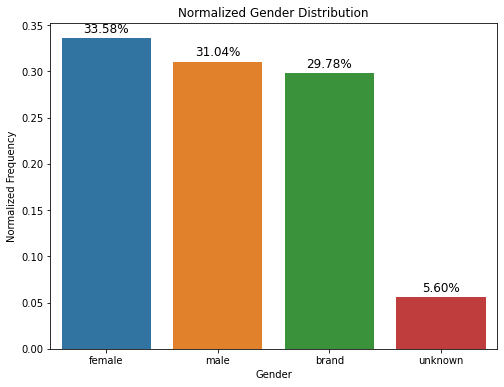

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

normalized_gender_counts = df_tw.gender.value_counts(normalize=True)

# Using seaborn for the bar plot
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=normalized_gender_counts.index, y=normalized_gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Normalized Frequency')
plt.title('Normalized Gender Distribution')

# Add values to the bars
for bar in bar_plot.containers[0]:
    height = bar.get_height()
    bar_plot.annotate(
        f'{height:.2%}',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontsize=12
    )

plt.show()

Se encuentra que los tres principales generos estan balanceados, pero se observa un 5,6% de los datos que tiene como genero "Unkown".

In [ ]:
df_tw.isnull().sum()

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           50
gender                      97
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
created                      0
description               3744
fav_number                   0
gender_gold              20000
link_color                   0
name                         0
profile_yn_gold          20000
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              19891
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            7484
user_timezone             7798
dtype: int64

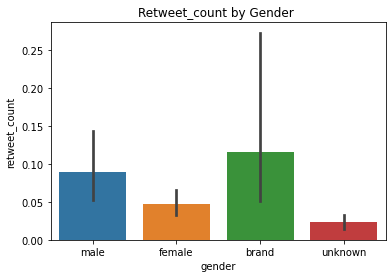

In [ ]:
sns.barplot(x='gender',y='retweet_count',data=df_tw)
plt.title('Retweet_count by Gender ')
plt.show()

In [ ]:
df_tw['user_timezone'].unique()
df_tw.groupby('user_timezone').size()

user_timezone
Abu Dhabi              25
Adelaide                5
Africa/Cairo            1
Africa/Lagos            2
Africa/Nairobi          1
                       ..
Wellington             20
West Central Africa    43
Yakutsk                 8
Yerevan                 6
Zagreb                  6
Length: 156, dtype: int64

In [ ]:
df_tw.user_timezone.unique()
df_tw.groupby('tweet_created').size()

tweet_created
10/26/15 12:39    1952
10/26/15 12:40    8076
10/26/15 13:18     265
10/26/15 13:19    5892
10/26/15 13:20    3865
dtype: int64

<Figure size 2160x2160 with 0 Axes>

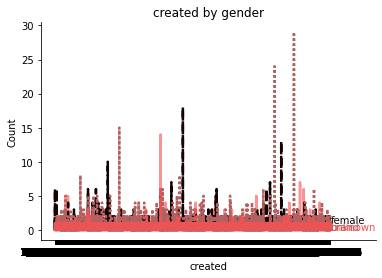

In [ ]:
df_viaje = df_tw.copy()
df_viaje = df_viaje[['created', 'gender']]
df_viaje['male'] = np.where(df_viaje.gender=='male',1,0)
df_viaje['female'] = np.where(df_viaje.gender=='female',1,0)
df_viaje['brand'] = np.where(df_viaje.gender=='brand',1,0)
df_viaje['unknown'] = np.where(df_viaje.gender=='unknown',1,0)
df_viaje
df_d = df_viaje.groupby(['created']).agg(
    male = ('male','sum'),
    female = ('female','sum'),
    brand = ('brand','sum'),
    unknown = ('unknown','sum'))
df_d
# df_d
import seaborn as sns
plt.figure(figsize=(30, 30))
fig, ax = plt.subplots()
ax = sns.lineplot(data=df_d, linewidth=2.5, palette=['#FA9494', '#140303', '#B46060', '#EA5455'], legend=None, linestyle='solid')
for line, name in zip(ax.lines, df_d.columns.tolist()):
	y = line.get_ydata()[-1]
	x = line.get_xdata()[-1]
	if not np.isfinite(y):
	    y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
	if not np.isfinite(y) or not np.isfinite(x):
	    continue
	text = ax.annotate(name,
		       xy=(x, y),
		       xytext=(0, 0),
		       color=line.get_color(),
		       xycoords=(ax.get_xaxis_transform(),
				 ax.get_yaxis_transform()),
		       textcoords="offset points")
	text_width = (text.get_window_extent(
	fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
	if np.isfinite(text_width):
		ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)
ax.set(xlabel='created', ylabel='Count', title='created by gender')
#ax.legend(title='Type', title_fontsize = 13)
sns.despine(bottom=False, left=False)
plt.grid(False)
plt.show()

In [ ]:
ct = pd.crosstab(df_tw['gender'], [df_tw['_golden']])#, normalize='columns')#, margins=True)
# # Plot the crosstab as a bar chart
# ax = ct.plot(kind='bar', figsize=(10, 6))
# ax.set_xlabel('Gender')
# ax.set_ylabel('Frequency')
# ax.set_title('Normalized Crosstab')
# plt.xticks(rotation=0)  # Rotate x-axis labels

# # Add percentage values on top of the bars
# for p in ax.patches:
#     width, height = p.get_width(), p.get_height()
#     x, y = p.get_xy()
#     ax.annotate(f'{height:.2}', (x + width / 2, y + height), ha='center', va='bottom')

# # Display the plot
# plt.show()
ct

_golden,False,True
gender,,
brand,5928,14
female,6685,15
male,6173,21
unknown,1117,0


In [ ]:
pd.crosstab(df_tw['gender'], [df_tw['_unit_state']])

_unit_state,finalized,golden
gender,,
brand,5928,14
female,6685,15
male,6173,21
unknown,1117,0


In [ ]:
pd.DataFrame(np.where(df_tw._trusted_judgments != 3,0,3)).value_counts(normalize=True)


3    0.997506
0    0.002494
dtype: float64

<Figure size 2160x2160 with 0 Axes>

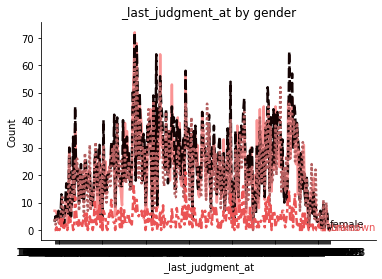

In [ ]:
df_viaje = df_tw.copy()
df_viaje = df_viaje[['_last_judgment_at', 'gender']]
df_viaje['male'] = np.where(df_viaje.gender=='male',1,0)
df_viaje['female'] = np.where(df_viaje.gender=='female',1,0)
df_viaje['brand'] = np.where(df_viaje.gender=='brand',1,0)
df_viaje['unknown'] = np.where(df_viaje.gender=='unknown',1,0)
df_viaje
df_d = df_viaje.groupby(['_last_judgment_at']).agg(
    male = ('male','sum'),
    female = ('female','sum'),
    brand = ('brand','sum'),
    unknown = ('unknown','sum'))
df_d
# df_d
import seaborn as sns
plt.figure(figsize=(30, 30))
fig, ax = plt.subplots()
ax = sns.lineplot(data=df_d, linewidth=2.5, palette=['#FA9494', '#140303', '#B46060', '#EA5455'], legend=None, linestyle='solid')
for line, name in zip(ax.lines, df_d.columns.tolist()):
	y = line.get_ydata()[-1]
	x = line.get_xdata()[-1]
	if not np.isfinite(y):
	    y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
	if not np.isfinite(y) or not np.isfinite(x):
	    continue
	text = ax.annotate(name,
		       xy=(x, y),
		       xytext=(0, 0),
		       color=line.get_color(),
		       xycoords=(ax.get_xaxis_transform(),
				 ax.get_yaxis_transform()),
		       textcoords="offset points")
	text_width = (text.get_window_extent(
	fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
	if np.isfinite(text_width):
		ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)
ax.set(xlabel='_last_judgment_at', ylabel='Count', title='_last_judgment_at by gender')
#ax.legend(title='Type', title_fontsize = 13)
sns.despine(bottom=False, left=False)
plt.grid(False)
plt.show()

<Figure size 2160x2160 with 0 Axes>

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


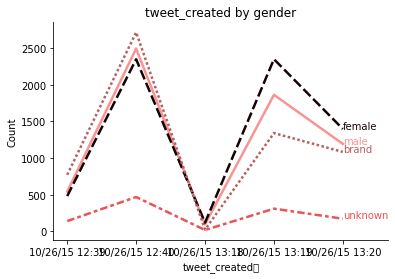

In [ ]:
df_viaje = df_tw.copy()
df_viaje = df_viaje[['tweet_created', 'gender']]
df_viaje['male'] = np.where(df_viaje.gender=='male',1,0)
df_viaje['female'] = np.where(df_viaje.gender=='female',1,0)
df_viaje['brand'] = np.where(df_viaje.gender=='brand',1,0)
df_viaje['unknown'] = np.where(df_viaje.gender=='unknown',1,0)
df_viaje
df_d = df_viaje.groupby(['tweet_created']).agg(
    male = ('male','sum'),
    female = ('female','sum'),
    brand = ('brand','sum'),
    unknown = ('unknown','sum'))
df_d
# df_d
import seaborn as sns
plt.figure(figsize=(30, 30))
fig, ax = plt.subplots()
ax = sns.lineplot(data=df_d, linewidth=2.5, palette=['#FA9494', '#140303', '#B46060', '#EA5455'], legend=None, linestyle='solid')
for line, name in zip(ax.lines, df_d.columns.tolist()):
	y = line.get_ydata()[-1]
	x = line.get_xdata()[-1]
	if not np.isfinite(y):
	    y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
	if not np.isfinite(y) or not np.isfinite(x):
	    continue
	text = ax.annotate(name,
		       xy=(x, y),
		       xytext=(0, 0),
		       color=line.get_color(),
		       xycoords=(ax.get_xaxis_transform(),
				 ax.get_yaxis_transform()),
		       textcoords="offset points")
	text_width = (text.get_window_extent(
	fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
	if np.isfinite(text_width):
		ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)
ax.set(xlabel='tweet_created	', ylabel='Count', title='tweet_created by gender')
#ax.legend(title='Type', title_fontsize = 13)
sns.despine(bottom=False, left=False)
plt.grid(False)
plt.show()

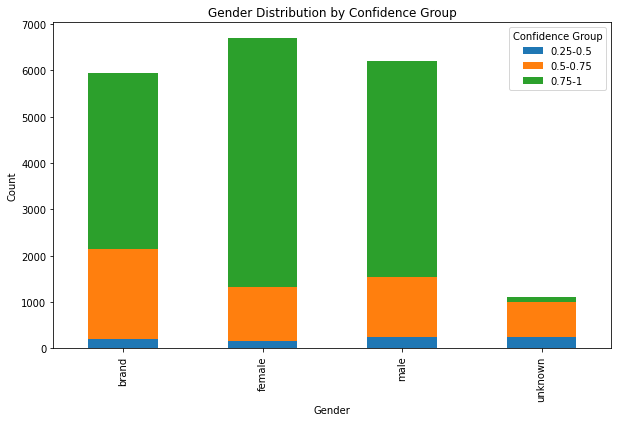

In [ ]:
# Define the bins and labels for the groups
bins = [0, 0.25, 0.5, 0.75, 1]
labels = ['0-0.25', '0.25-0.5', '0.5-0.75', '0.75-1']

# Create a new column 'group' based on the ranges and labels
df_tw['group_gender:confidence'] = pd.cut(df_tw['gender:confidence'], bins=bins, labels=labels)


# Create a crosstab
ct = pd.crosstab(df_tw['gender'], df_tw['group_gender:confidence'])

# Plot the crosstab as a bar plot
ax = ct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Gender Distribution by Confidence Group')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Confidence Group', loc='upper right')

# Display the plot
plt.show()

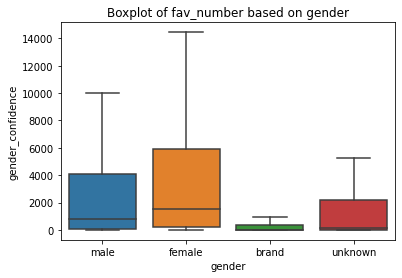

In [ ]:
#Outliers
sns.boxplot(data=df_tw, x='gender', y='fav_number', showfliers=False)
#Add a title and y-axis label
plt.title('Boxplot of fav_number based on gender')
plt.ylabel('gender_confidence')
# Show the plot
plt.show()

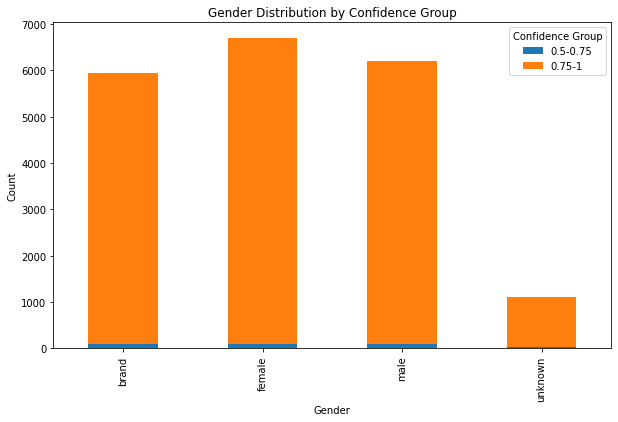

In [ ]:
# Define the bins and labels for the groups
bins = [0, 0.25, 0.5, 0.75, 1]
labels = ['0-0.25', '0.25-0.5', '0.5-0.75', '0.75-1']

# Create a new column 'group' based on the ranges and labels
df_tw['group_profile_yn:confidence'] = pd.cut(df_tw['profile_yn:confidence'], bins=bins, labels=labels)


# Create a crosstab
ct = pd.crosstab(df_tw['gender'], df_tw['group_profile_yn:confidence'])

# Plot the crosstab as a bar plot
ax = ct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Gender Distribution by Confidence Group')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Confidence Group', loc='upper right')



# Display the plot
plt.show()

In [ ]:
df_tw.tweet_location.value_counts()

London                            152
United States                     142
USA                                94
UK                                 92
Los Angeles, CA                    69
                                 ... 
Currently, ehh... Limbo?!??...      1
texas  ÷Ûü                       1
oakland                             1
Moray Scotland, United Kingdom      1
Glendale CA                         1
Name: tweet_location, Length: 7864, dtype: int64

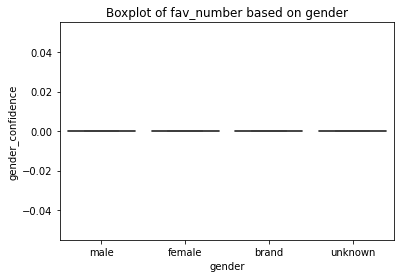

In [ ]:
#Outliers
sns.boxplot(data=df_tw, x='gender', y='retweet_count', showfliers=False)
#Add a title and y-axis label
plt.title('Boxplot of fav_number based on gender')
plt.ylabel('gender_confidence')
# Show the plot
plt.show()

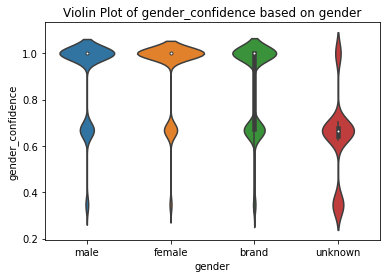

In [ ]:
# Create a violin plot of Tuition with a hue based on Is.Non.Annual.
sns.violinplot(data=df_tw, x='gender', y='gender:confidence')
# Add a title and y-axis label
plt.title('Violin Plot of gender_confidence based on gender')
plt.ylabel('gender_confidence')
# Show the plot
plt.show()

In [ ]:
df_tw.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone',
       'group_gender:confidence', 'group_profile_yn:confidence'],
      dtype='object')

## Preparación de los datos.

Se removeran las variables '_unit_id', 'tweet_id', '_golden', '_unit_state' '_trusted_judgments', '_last_judgment_at','profile_yn', 'gender_gold', 'profile_yn_gold' las primeras dos por que son un indetificador unico, y no se percibe que por consecusión la de creación sea una variable descriptiva, las restantes por baja representatividad de otros valores.</br>

'name' se eliminara para eliminar sezgos por parte de que un nombre defina el genero de una persona.

Las variables 'profileimage', 'text','description', debido a que se requiere otro tipo de tratamientos que sale del scope de este ejercicio.

Las variables de 'tweet_coord',, 'tweet_location', 'user_timezone', se removeran a su vez para reducir la posible dimencionalidad que se generaria por la futura transformación de datos.



In [ ]:
df = df_tw.copy()
df = df[df.gender!='unknown']
df = df[df.gender.notnull()]

df = df[['gender', 'gender:confidence',
       'profile_yn:confidence', 'created',  'fav_number','link_color', 'retweet_count', 'sidebar_color', 'tweet_count',
       'tweet_created']]
df.info()

#Se extrae la fecha sin la hora y se transforma en un tipo date time.
df.created = df.created.str.split(' ').str[0]
df.created = pd.to_datetime(df.created)
df['month_created'] = df['created'].dt.month
df['day_created'] = df['created'].dt.day
df['year_created'] = df['created'].dt.year



df.tweet_created = df.tweet_created.str.split(' ').str[0]
df.tweet_created = pd.to_datetime(df.tweet_created)
df['month_tweet_created'] = df['tweet_created'].dt.month
df['day_tweet_created'] = df['tweet_created'].dt.day
df['year_tweet_created'] = df['tweet_created'].dt.year
df = df.drop(['created', 'tweet_created'], axis=1)


df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18836 entries, 0 to 20049
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 18836 non-null  object 
 1   gender:confidence      18836 non-null  float64
 2   profile_yn:confidence  18836 non-null  float64
 3   created                18836 non-null  object 
 4   fav_number             18836 non-null  int64  
 5   link_color             18836 non-null  object 
 6   retweet_count          18836 non-null  int64  
 7   sidebar_color          18836 non-null  object 
 8   tweet_count            18836 non-null  int64  
 9   tweet_created          18836 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 1.6+ MB


,gender,gender:confidence,profile_yn:confidence,fav_number,link_color,retweet_count,sidebar_color,tweet_count,month_created,day_created,year_created,month_tweet_created,day_tweet_created,year_tweet_created
0,male,1.0000,1.0,0,08C2C2,0,FFFFFF,110964,12,5,2013,10,26,2015
1,male,1.0000,1.0,68,0084B4,0,C0DEED,7471,10,1,2012,10,26,2015
2,male,0.6625,1.0,7696,ABB8C2,1,C0DEED,5617,11,28,2014,10,26,2015
3,male,1.0000,1.0,202,0084B4,0,C0DEED,1693,6,11,2009,10,26,2015
4,female,1.0000,1.0,37318,3B94D9,0,0,31462,4,16,2014,10,26,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,female,1.0000,1.0,302,0084B4,0,C0DEED,783,8,5,2015,10,26,2015
20046,male,1.0000,1.0,2513,CFB929,0,0,13523,8,15,2012,10,26,2015
20047,male,1.0000,1.0,50,0084B4,0,C0DEED,26419,9,3,2012,10,26,2015
20048,female,0.8489,1.0,70804,9266CC,0,0,56073,11,6,2012,10,26,2015


In [ ]:
df = df.rename(columns={'gender': 'y'})
df

,y,gender:confidence,profile_yn:confidence,fav_number,link_color,retweet_count,sidebar_color,tweet_count,month_created,day_created,year_created,month_tweet_created,day_tweet_created,year_tweet_created
0,male,1.0000,1.0,0,08C2C2,0,FFFFFF,110964,12,5,2013,10,26,2015
1,male,1.0000,1.0,68,0084B4,0,C0DEED,7471,10,1,2012,10,26,2015
2,male,0.6625,1.0,7696,ABB8C2,1,C0DEED,5617,11,28,2014,10,26,2015
3,male,1.0000,1.0,202,0084B4,0,C0DEED,1693,6,11,2009,10,26,2015
4,female,1.0000,1.0,37318,3B94D9,0,0,31462,4,16,2014,10,26,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,female,1.0000,1.0,302,0084B4,0,C0DEED,783,8,5,2015,10,26,2015
20046,male,1.0000,1.0,2513,CFB929,0,0,13523,8,15,2012,10,26,2015
20047,male,1.0000,1.0,50,0084B4,0,C0DEED,26419,9,3,2012,10,26,2015
20048,female,0.8489,1.0,70804,9266CC,0,0,56073,11,6,2012,10,26,2015


In [ ]:
df['link_color'] = df['link_color'].astype(str)
df['sidebar_color'] = df['sidebar_color'].astype(str)
df.link_color = np.where(((df.link_color.str.len())!=6),'000000',df.link_color)
df['link_color'] = df['link_color'].astype(str).apply(lambda x: '#' + x)
df.sidebar_color = np.where(((df.sidebar_color.str.len())!=6),'000000',df.sidebar_color)
df['sidebar_color'] = df['sidebar_color'].astype(str).apply(lambda x: '#' + x)
df

,y,gender:confidence,profile_yn:confidence,fav_number,link_color,retweet_count,sidebar_color,tweet_count,month_created,day_created,year_created,month_tweet_created,day_tweet_created,year_tweet_created
0,male,1.0000,1.0,0,#08C2C2,0,#FFFFFF,110964,12,5,2013,10,26,2015
1,male,1.0000,1.0,68,#0084B4,0,#C0DEED,7471,10,1,2012,10,26,2015
2,male,0.6625,1.0,7696,#ABB8C2,1,#C0DEED,5617,11,28,2014,10,26,2015
3,male,1.0000,1.0,202,#0084B4,0,#C0DEED,1693,6,11,2009,10,26,2015
4,female,1.0000,1.0,37318,#3B94D9,0,#000000,31462,4,16,2014,10,26,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,female,1.0000,1.0,302,#0084B4,0,#C0DEED,783,8,5,2015,10,26,2015
20046,male,1.0000,1.0,2513,#CFB929,0,#000000,13523,8,15,2012,10,26,2015
20047,male,1.0000,1.0,50,#0084B4,0,#C0DEED,26419,9,3,2012,10,26,2015
20048,female,0.8489,1.0,70804,#9266CC,0,#000000,56073,11,6,2012,10,26,2015


In [ ]:
df.link_color

0        #08C2C2
1        #0084B4
2        #ABB8C2
3        #0084B4
4        #3B94D9
          ...   
20045    #0084B4
20046    #CFB929
20047    #0084B4
20048    #9266CC
20049    #0084B4
Name: link_color, Length: 18836, dtype: object

Para poder usar las variables de colores, se pasara de codigo HEX a RGB, transformando esta variable categorica a 3 vectroes numericos, pero estos deben de contar con 6 caracteres, se remplzara por 0 los que no cumplan con esta condición.

In [ ]:
def hex_to_rgb(hex_color):
    # Remove the '#' from the beginning of the string, if present
    if hex_color.startswith('#'):
        hex_color = hex_color[1:]

    # Convert the 2-character hex components to their decimal equivalents
    red = int(hex_color[0:2], 16)
    green = int(hex_color[2:4], 16)
    blue = int(hex_color[4:6], 16)

    # Return the RGB color as a tuple
    return (red, green, blue)


In [ ]:
df['link_color_R'] = df.link_color.apply(lambda x: hex_to_rgb(x)[0])
df['link_color_G'] = df.link_color.apply(lambda x: hex_to_rgb(x)[1])
df['link_color_B'] = df.link_color.apply(lambda x: hex_to_rgb(x)[2])

df['sidebar_color_R'] = df.sidebar_color.apply(lambda x: hex_to_rgb(x)[0])
df['sidebar_color_G'] = df.sidebar_color.apply(lambda x: hex_to_rgb(x)[1])
df['sidebar_color_B'] = df.sidebar_color.apply(lambda x: hex_to_rgb(x)[2])

df = df.drop(['link_color', 'sidebar_color'], axis=1)

df

,y,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,month_created,day_created,year_created,month_tweet_created,day_tweet_created,year_tweet_created,link_color_R,link_color_G,link_color_B,sidebar_color_R,sidebar_color_G,sidebar_color_B
0,male,1.0000,1.0,0,0,110964,12,5,2013,10,26,2015,8,194,194,255,255,255
1,male,1.0000,1.0,68,0,7471,10,1,2012,10,26,2015,0,132,180,192,222,237
2,male,0.6625,1.0,7696,1,5617,11,28,2014,10,26,2015,171,184,194,192,222,237
3,male,1.0000,1.0,202,0,1693,6,11,2009,10,26,2015,0,132,180,192,222,237
4,female,1.0000,1.0,37318,0,31462,4,16,2014,10,26,2015,59,148,217,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,female,1.0000,1.0,302,0,783,8,5,2015,10,26,2015,0,132,180,192,222,237
20046,male,1.0000,1.0,2513,0,13523,8,15,2012,10,26,2015,207,185,41,0,0,0
20047,male,1.0000,1.0,50,0,26419,9,3,2012,10,26,2015,0,132,180,192,222,237
20048,female,0.8489,1.0,70804,0,56073,11,6,2012,10,26,2015,146,102,204,0,0,0


## Modelamiento.

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the breast cancer dataset
data = df.copy()
X = data.drop('y', axis=1)
y = data.y

# Scale the data using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Print the sizes of the resulting sets
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 11301
Validation set size: 3767
Test set size: 3768


In [ ]:
class Perceptron:
    def __init__(self, num_inputs, num_classes, learning_rate=0.1, max_epochs=100):
        self.weights = np.zeros((num_inputs, num_classes))
        self.bias = np.zeros(num_classes)
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs

    def fit(self, X, y):
        for epoch in range(self.max_epochs):
            for i in range(len(X)):
                x = X[i]
                z = np.dot(x, self.weights) + self.bias
                y_pred = np.argmax(z)
                if y_pred != y[i]:
                    self.weights[:, y[i]] += self.learning_rate * x
                    self.bias[y[i]] += self.learning_rate
                    self.weights[:, y_pred] -= self.learning_rate * x
                    self.bias[y_pred] -= self.learning_rate

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return np.argmax(z, axis=1)

In [ ]:
y_train.unique()

array(['male', 'brand', 'female'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# One-hot encode the target labels
enc = OneHotEncoder(sparse=False)
y_train_encoded = enc.fit_transform(y_train.to_numpy().reshape(-1, 1))

# Train the perceptron
perceptron = Perceptron(num_inputs=X_train.shape[1], num_classes=3)
perceptron.fit(X_train, np.argmax(y_train_encoded, axis=1))

# Predict the class labels for the test set
y_test_pred = perceptron.predict(X_test)

# Transform y_test_pred back into one-hot encoded format
y_test_pred_onehot = np.zeros((y_test_pred.size, y_train_encoded.shape[1]))
y_test_pred_onehot[np.arange(y_test_pred.size), y_test_pred] = 1

# Decode the predicted labels
y_test_pred_decoded = enc.inverse_transform(y_test_pred_onehot)

# Compute the accuracy
accuracy = np.mean(y_test == y_test_pred_decoded.ravel())
print(f"Accuracy: {accuracy}")

# Compute the classification report
report = classification_report(y_test, y_test_pred_decoded, output_dict=True)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.3712845010615711
Precision: 0.36310918396486913
Recall: 0.37128450106157107
F1 Score: 0.33921771800392864


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

enc = OneHotEncoder(sparse=False)
y_train_encoded = enc.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test_encoded = enc.transform(y_test.to_numpy().reshape(-1, 1))

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=X_train.shape[1], activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=y_train_encoded.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
model.fit(X_train, y_train_encoded, epochs=200, batch_size=32, validation_split=0.1, callbacks=[early_stopping, model_checkpoint])

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test_encoded)


# Make predictions on the test set
y_test_pred_encoded = model.predict(X_test)

# Decode the predicted labels
y_test_pred_decoded = enc.inverse_transform(y_test_pred_encoded)

# Compute the classification report
report = classification_report(y_test, y_test_pred_decoded, output_dict=True)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']


print(f"Test set accuracy: {score[1]}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/200
318/318 [==============================] - 1s 2ms/step - loss: 1.1063 - accuracy: 0.4023 - val_loss: 1.0511 - val_accuracy: 0.4527
Epoch 2/200
318/318 [==============================] - 0s 2ms/step - loss: 1.0359 - accuracy: 0.4772 - val_loss: 1.0344 - val_accuracy: 0.4766
Epoch 3/200
318/318 [==============================] - 0s 1ms/step - loss: 1.0183 - accuracy: 0.4925 - val_loss: 1.0268 - val_accuracy: 0.4801
Epoch 4/200
318/318 [==============================] - 0s 1ms/step - loss: 1.0073 - accuracy: 0.5061 - val_loss: 1.0202 - val_accuracy: 0.4889
Epoch 5/200
318/318 [==============================] - 0s 1ms/step - loss: 0.9991 - accuracy: 0.5084 - val_loss: 1.0144 - val_accuracy: 0.4881
Epoch 6/200
318/318 [==============================] - 0s 1ms/step - loss: 0.9921 - accuracy: 0.5127 - val_loss: 1.0093 - val_accuracy: 0.4907
Epoch 7/200
318/318 [==============================] - 0s 1ms/step - loss: 0.9860 - accuracy: 0.5161 - val_loss: 1.0051 - val_accuracy: 0.5040

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=X_train.shape[1]//2, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=X_train.shape[1]//2, activation='relu'),
    tf.keras.layers.Dense(units=X_train.shape[1]//2, activation='relu'),
    tf.keras.layers.Dense(units=y_train_encoded.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
model.fit(X_train, y_train_encoded, epochs=200, batch_size=32, validation_split=0.1, callbacks=[early_stopping, model_checkpoint])

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test_encoded)


# Make predictions on the test set
y_test_pred_encoded = model.predict(X_test)

# Decode the predicted labels
y_test_pred_decoded = enc.inverse_transform(y_test_pred_encoded)

# Compute the classification report
report = classification_report(y_test, y_test_pred_decoded, output_dict=True)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']

print(f"Test set accuracy: {score[1]}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")


Epoch 1/200
318/318 [==============================] - 1s 2ms/step - loss: 1.1016 - accuracy: 0.3869 - val_loss: 1.0669 - val_accuracy: 0.4067
Epoch 2/200
318/318 [==============================] - 1s 2ms/step - loss: 1.0554 - accuracy: 0.4534 - val_loss: 1.0466 - val_accuracy: 0.4483
Epoch 3/200
318/318 [==============================] - 1s 2ms/step - loss: 1.0344 - accuracy: 0.4731 - val_loss: 1.0320 - val_accuracy: 0.4624
Epoch 4/200
318/318 [==============================] - 0s 2ms/step - loss: 1.0193 - accuracy: 0.4865 - val_loss: 1.0249 - val_accuracy: 0.4801
Epoch 5/200
318/318 [==============================] - 1s 2ms/step - loss: 1.0083 - accuracy: 0.4975 - val_loss: 1.0148 - val_accuracy: 0.4934
Epoch 6/200
318/318 [==============================] - 1s 2ms/step - loss: 1.0002 - accuracy: 0.5060 - val_loss: 1.0077 - val_accuracy: 0.4943
Epoch 7/200
318/318 [==============================] - 0s 1ms/step - loss: 0.9929 - accuracy: 0.5099 - val_loss: 1.0019 - val_accuracy: 0.5084

## Bono

In [ ]:
df_bono = df.copy()
df_bono['text'] = df_tw['text']
df_bono['description'] = df_tw['description']

df_bono.head()

# agregar nkt

,y,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,month_created,day_created,year_created,month_tweet_created,day_tweet_created,year_tweet_created,link_color_R,link_color_G,link_color_B,sidebar_color_R,sidebar_color_G,sidebar_color_B,text,description
0,male,1.0000,1.0,0,0,110964,12,5,2013,10,26,2015,8,194,194,255,255,255,Robbie E Responds To Critics After Win Against...,i sing my own rhythm.
1,male,1.0000,1.0,68,0,7471,10,1,2012,10,26,2015,0,132,180,192,222,237,ÛÏIt felt like they were my friends and I was...,I'm the author of novels filled with family dr...
2,male,0.6625,1.0,7696,1,5617,11,28,2014,10,26,2015,171,184,194,192,222,237,i absolutely adore when louis starts the songs...,louis whining and squealing and all
3,male,1.0000,1.0,202,0,1693,6,11,2009,10,26,2015,0,132,180,192,222,237,Hi @JordanSpieth - Looking at the url - do you...,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe..."
4,female,1.0000,1.0,37318,0,31462,4,16,2014,10,26,2015,59,148,217,0,0,0,Watching Neighbours on Sky+ catching up with t...,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...


In [ ]:
import re
def normalize_text(text): # Función para alguna de estas limpiezas:
    # Remove non-ASCII chars.
    text = re.sub('[^\x00-\x7F]+',' ', text)
    # Remove URLs
    text = re.sub('https?:\/\/.*[\r\n]*', ' ', text)
    # Remove special chars.
    text = re.sub('[?!+%{}:;.,"\'()\[\]_]', '',text)
    # Remove double spaces.
    text = re.sub('\s+',' ',text)
    return text

In [ ]:
df_bono["text_norm"] = [normalize_text(text) for text in df_bono["text"]] # denominamos la nueva variable limpia como "text_norm"
df_bono['text_norm'] = df_bono['text_norm'].str.lower() # minusculas
df_bono['text_norm'] = df_bono['text_norm'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x)) # sólo caracteres entrea a-z
df_bono['text_norm'] = df_bono['text_norm'].apply(lambda x: re.sub('\s+', ' ', x)) # dobles espacios
df_bono['text_norm']= df_bono['text_norm'].replace('[#+]', "", regex=True) # eliminar caracter.
df_bono['text_norm'].replace('[@+]', "", regex=True,inplace=True)# eliminar caracter.
df_bono['text_norm'].replace('[()]', "", regex=True,inplace=True)# eliminar caracter.
df_bono['text_norm']

0        robbie e responds to critics after win against...
1         it felt like they were my friends and i was l...
2        i absolutely adore when louis starts the songs...
3        hi jordanspieth looking at the url do you use ...
4        watching neighbours on sky catching up with th...
                               ...                        
20045     lookupondeath fine and ill drink tea too i lo...
20046    greg hardy you a good player and all but dont ...
20047    you can miss people and still never want to se...
20048     bitemyapp i had noticed your tendency to pee ...
20049    i think for my apush creative project im going...
Name: text_norm, Length: 18836, dtype: object

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# If you want to use 'nltk.word_tokenize', you should import the nltk library:
# import nltk

# Tokenize the text
df_bono['text_norm'] = [word_tokenize(tweet) for tweet in df_bono['text_norm']]

descrip_new = []
for each_row in df_bono['text_norm']:
    descrip_new.append([i for i in each_row if i.isalpha()])

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
descrip_new_alpha = []
for each_row in descrip_new:
    descrip_new_alpha.append([i for i in each_row if i not in stop_words])


In [ ]:
df_bono['text_norm'] [0]

['robbie',
 'e',
 'responds',
 'to',
 'critics',
 'after',
 'win',
 'against',
 'eddie',
 'edwards',
 'in',
 'the',
 'worldtitleseries']

In [ ]:
description_new_lemma = []
lemma = nltk.WordNetLemmatizer()
for each_row in descrip_new_alpha:
    description_new_lemma.append([lemma.lemmatize(word) for word in each_row])

In [ ]:
df_bono['text_norm'] = description_new_lemma

df_bono['text_norm'] = [" ".join(desc) for desc in df_bono['text_norm'].values]

df_bono['text_norm'] [0]

'robbie e responds critic win eddie edward worldtitleseries'

In [ ]:
df_bono['description']=df_bono['description'].values.astype('str') # para asegurar que tenemos cadena de caracteres.
df_bono['description_norm'] = [normalize_text(text) for text in df_bono['description']] # denominamos la nueva variable limpia como "description_norm"
df_bono['description_norm'] = df_bono['description_norm'].str.lower() # minusculas
df_bono['description_norm'] = df_bono['description_norm'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x)) # sólo caracteres entrea a-z
df_bono['description_norm'] = df_bono['description_norm'].apply(lambda x: re.sub('\s+', ' ', x)) # dobles espacios
df_bono['description_norm']= df_bono['description_norm'].replace('[#+]', "", regex=True) # eliminar caracter.
df_bono['description_norm'].replace('[@+]', "", regex=True,inplace=True)# eliminar caracter.
df_bono['description_norm'].replace('[()]', "", regex=True,inplace=True)# eliminar caracter.
df_bono['description_norm']

0                                     i sing my own rhythm
1        im the author of novels filled with family dra...
2                      louis whining and squealing and all
3        mobile guy ers shazam google kleiner perkins y...
4        ricky wilson the best frontman kaiser chiefs t...
                               ...                        
20045                                                   rp
20046    whatever you like its not a problem at all cha...
20047     teambarcelona you look lost so you should fol...
20048    anti statist i homeschool my kids aspiring tho...
20049                        teamwork makes the dream work
Name: description_norm, Length: 18836, dtype: object

In [ ]:
from nltk.tokenize import word_tokenize
df_bono['description_norm'] = [nltk.word_tokenize(tweet) for tweet in df_bono['description_norm']]
descrip_new=[]
for each_row in df_bono['description_norm']:
    descrip_new.append([i for i in each_row if i.isalpha()])
descrip_new_alpha=[]

for each_row in descrip_new:
    descrip_new_alpha.append([i for i in each_row if i not in stop_words])

description_new_lemma = []
lemma = nltk.WordNetLemmatizer()
for each_row in descrip_new_alpha:
    description_new_lemma.append([lemma.lemmatize(word) for word in each_row])

df_bono['description_norm'] = description_new_lemma

df_bono['description_norm'] = [" ".join(desc) for desc in df_bono['description_norm'].values]
df_bono['description_norm'] [0]
df_bono = df_bono.drop(['text', 'description'], axis=1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(max_features = 15)
x = cv.fit_transform(df_bono['description_norm']).toarray()
x1=cv.fit_transform(df_bono['text_norm']).toarray()

In [ ]:
df_bono = df_bono.drop(['text_norm', 'description_norm'], axis=1)
df_bono = df_bono.reset_index()

In [ ]:
A=pd.DataFrame(x)
B=pd.DataFrame(x1)
A

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18831,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18832,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
18833,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
18834,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_bono=pd.concat([df_bono,A, B],axis=1)
df_bono.shape

(18836, 49)

In [ ]:

df_bono

,index,y,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,month_created,day_created,year_created,...,5,6,7,8,9,10,11,12,13,14
0,0,male,1.0000,1.0,0,0,110964,12,5,2013,...,0,0,0,0,0,0,0,0,0,0
1,1,male,1.0000,1.0,68,0,7471,10,1,2012,...,0,1,0,0,0,0,0,0,0,0
2,2,male,0.6625,1.0,7696,1,5617,11,28,2014,...,0,0,0,0,0,0,0,0,0,0
3,3,male,1.0000,1.0,202,0,1693,6,11,2009,...,0,0,0,0,0,0,0,0,0,0
4,4,female,1.0000,1.0,37318,0,31462,4,16,2014,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18831,20045,female,1.0000,1.0,302,0,783,8,5,2015,...,0,0,1,0,0,0,0,0,0,0
18832,20046,male,1.0000,1.0,2513,0,13523,8,15,2012,...,0,0,0,0,0,0,0,0,0,0
18833,20047,male,1.0000,1.0,50,0,26419,9,3,2012,...,0,0,0,0,0,0,1,0,0,0
18834,20048,female,0.8489,1.0,70804,0,56073,11,6,2012,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_bono.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18836 entries, 0 to 18835
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  18836 non-null  int64  
 1   y                      18836 non-null  object 
 2   gender:confidence      18836 non-null  float64
 3   profile_yn:confidence  18836 non-null  float64
 4   fav_number             18836 non-null  int64  
 5   retweet_count          18836 non-null  int64  
 6   tweet_count            18836 non-null  int64  
 7   month_created          18836 non-null  int64  
 8   day_created            18836 non-null  int64  
 9   year_created           18836 non-null  int64  
 10  month_tweet_created    18836 non-null  int64  
 11  day_tweet_created      18836 non-null  int64  
 12  year_tweet_created     18836 non-null  int64  
 13  link_color_R           18836 non-null  int64  
 14  link_color_G           18836 non-null  int64  
 15  li

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the breast cancer dataset
df_bono = df_bono[df_bono.y.notnull()]
data = df_bono.copy()
X = data.drop('y', axis=1)
y = data.y

# Convert all feature names to strings
X.columns = X.columns.astype(str)

# Fill missing values with the mean of the corresponding column
X = X.fillna(X.mean())

# Scale the data using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Print the sizes of the resulting sets
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")


Training set size: 11301
Validation set size: 3767
Test set size: 3768


In [ ]:
class Perceptron:
    def __init__(self, num_inputs, num_classes, learning_rate=0.1, max_epochs=100):
        self.weights = np.zeros((num_inputs, num_classes))
        self.bias = np.zeros(num_classes)
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs

    def fit(self, X, y):
        for epoch in range(self.max_epochs):
            for i in range(len(X)):
                x = X[i]
                z = np.dot(x, self.weights) + self.bias
                y_pred = np.argmax(z)
                if y_pred != y[i]:
                    self.weights[:, y[i]] += self.learning_rate * x
                    self.bias[y[i]] += self.learning_rate
                    self.weights[:, y_pred] -= self.learning_rate * x
                    self.bias[y_pred] -= self.learning_rate

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return np.argmax(z, axis=1)

In [ ]:
y_train.unique()

array(['male', 'brand', 'female'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# One-hot encode the target labels
enc = OneHotEncoder(sparse=False)
y_train_encoded = enc.fit_transform(y_train.to_numpy().reshape(-1, 1))

# Train the perceptron
perceptron = Perceptron(num_inputs=X_train.shape[1], num_classes=3)
perceptron.fit(X_train, np.argmax(y_train_encoded, axis=1))

# Predict the class labels for the test set
y_test_pred = perceptron.predict(X_test)

# Transform y_test_pred back into one-hot encoded format
y_test_pred_onehot = np.zeros((y_test_pred.size, y_train_encoded.shape[1]))
y_test_pred_onehot[np.arange(y_test_pred.size), y_test_pred] = 1

# Decode the predicted labels
y_test_pred_decoded = enc.inverse_transform(y_test_pred_onehot)

# Compute the accuracy
accuracy = np.mean(y_test == y_test_pred_decoded.ravel())
print(f"Accuracy: {accuracy}")

# Compute the classification report
report = classification_report(y_test, y_test_pred_decoded, output_dict=True)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.4124203821656051
Precision: 0.4100586158611066
Recall: 0.4124203821656051
F1 Score: 0.410855943715647


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

enc = OneHotEncoder(sparse=False)
y_train_encoded = enc.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test_encoded = enc.transform(y_test.to_numpy().reshape(-1, 1))

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=X_train.shape[1], activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=y_train_encoded.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
model.fit(X_train, y_train_encoded, epochs=200, batch_size=32, validation_split=0.1, callbacks=[early_stopping, model_checkpoint])

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test_encoded)


# Make predictions on the test set
y_test_pred_encoded = model.predict(X_test)

# Decode the predicted labels
y_test_pred_decoded = enc.inverse_transform(y_test_pred_encoded)

# Compute the classification report
report = classification_report(y_test, y_test_pred_decoded, output_dict=True)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']


print(f"Test set accuracy: {score[1]}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Epoch 1/200


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


318/318 [==============================] - 1s 2ms/step - loss: 1.0063 - accuracy: 0.4832 - val_loss: 0.9394 - val_accuracy: 0.5358
Epoch 2/200
318/318 [==============================] - 1s 2ms/step - loss: 0.9307 - accuracy: 0.5338 - val_loss: 0.9214 - val_accuracy: 0.5261
Epoch 3/200
318/318 [==============================] - 1s 2ms/step - loss: 0.9124 - accuracy: 0.5442 - val_loss: 0.9093 - val_accuracy: 0.5376
Epoch 4/200
318/318 [==============================] - 1s 2ms/step - loss: 0.8990 - accuracy: 0.5534 - val_loss: 0.9035 - val_accuracy: 0.5420
Epoch 5/200
318/318 [==============================] - 1s 2ms/step - loss: 0.8872 - accuracy: 0.5636 - val_loss: 0.8973 - val_accuracy: 0.5385
Epoch 6/200
318/318 [==============================] - 1s 2ms/step - loss: 0.8777 - accuracy: 0.5683 - val_loss: 0.8988 - val_accuracy: 0.5402
Epoch 7/200
318/318 [==============================] - 1s 2ms/step - loss: 0.8705 - accuracy: 0.5712 - val_loss: 0.8954 - val_accuracy: 0.5393
Epoch 8/200

In [ ]:
print("Checking for NaN values in X_train: ", np.isnan(X_train).any())
print("Checking for NaN values in y_train_encoded: ", np.isnan(y_train_encoded).any())
print("Checking for NaN values in X_test: ", np.isnan(X_test).any())
print("Checking for NaN values in y_test_encoded: ", np.isnan(y_test_encoded).any())


Checking for NaN values in X_train:  False
Checking for NaN values in y_train_encoded:  False
Checking for NaN values in X_test:  False
Checking for NaN values in y_test_encoded:  False


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=X_train.shape[1]//2, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=X_train.shape[1]//2, activation='relu'),
    tf.keras.layers.Dense(units=X_train.shape[1]//2, activation='relu'),
    tf.keras.layers.Dense(units=y_train_encoded.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
model.fit(X_train, y_train_encoded, epochs=200, batch_size=32, validation_split=0.1, callbacks=[early_stopping, model_checkpoint])

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test_encoded)


# Make predictions on the test set
y_test_pred_encoded = model.predict(X_test)

# Decode the predicted labels
y_test_pred_decoded = enc.inverse_transform(y_test_pred_encoded)

# Compute the classification report
report = classification_report(y_test, y_test_pred_decoded, output_dict=True)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']

print(f"Test set accuracy: {score[1]}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")


Epoch 1/200
318/318 [==============================] - 1s 2ms/step - loss: 0.9919 - accuracy: 0.4638 - val_loss: 0.9543 - val_accuracy: 0.4987
Epoch 2/200
318/318 [==============================] - 1s 2ms/step - loss: 0.9368 - accuracy: 0.5177 - val_loss: 0.9298 - val_accuracy: 0.5323
Epoch 3/200
318/318 [==============================] - 1s 2ms/step - loss: 0.9160 - accuracy: 0.5341 - val_loss: 0.9132 - val_accuracy: 0.5332
Epoch 4/200
318/318 [==============================] - 0s 2ms/step - loss: 0.8998 - accuracy: 0.5512 - val_loss: 0.9023 - val_accuracy: 0.5517
Epoch 5/200
318/318 [==============================] - 1s 2ms/step - loss: 0.8876 - accuracy: 0.5585 - val_loss: 0.9039 - val_accuracy: 0.5482
Epoch 6/200
318/318 [==============================] - 0s 2ms/step - loss: 0.8789 - accuracy: 0.5631 - val_loss: 0.8990 - val_accuracy: 0.5455
Epoch 7/200
318/318 [==============================] - 1s 2ms/step - loss: 0.8684 - accuracy: 0.5719 - val_loss: 0.9014 - val_accuracy: 0.5164